## Packages

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import scipy
from scipy.fft import fft
from scipy import stats

import netCDF4
from netCDF4 import Dataset

import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.pyplot import cm

import datetime
from datetime import datetime, date

import sys
import subprocess
import glob
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
import os
sys.path.append(os.path.abspath("d:/Users/julia/Desktop/Academia/01_Mestrado/Work/Utils"))
from HistDir import *
from veldire2uv import *

## Dados Mercator

In [2]:
# filenames = glob.glob("D:/Users/julia/Desktop/Academia/01_Mestrado/Dados/Mercator/*.nc")
# merc = xr.open_mfdataset(filenames)
# _, index = np.unique(merc['time'], return_index=True)
# merc = merc.isel(time=index)

filenames = glob.glob("D:/Users/julia/Desktop/Academia/01_Mestrado/Dados/Mercator/*2017*.nc")
merc = xr.open_mfdataset(filenames)
_, index = np.unique(merc['time'], return_index=True)
merc = merc.isel(time=index)

## Dados Climate Forecast System

In [22]:
# filenames = glob.glob("D:/Users/julia/Desktop/Academia/01_Mestrado/Dados/CFS/CFSR/*.grb2.nc")
# cfsr = xr.open_mfdataset(filenames)
# _, index = np.unique(cfsr['time'], return_index=True)
# cfsr = cfsr.isel(time=index)

# filenames = glob.glob("D:/Users/julia/Desktop/Academia/01_Mestrado/Dados/CFS/CFSv2/*.grb2.nc")
# cfs2 = xr.open_mfdataset(filenames)
# _, index = np.unique(cfs2['time'], return_index=True)
# cfs2 = cfs2.isel(time=index)

filenames = glob.glob("D:/Users/julia/Desktop/Academia/01_Mestrado/Dados/CFS/CFSv2/*2017*.grb2.nc")
cfs2 = xr.open_mfdataset(filenames)
_, index = np.unique(cfs2['time'], return_index=True)
cfs2 = cfs2.isel(time=index)

cfsmerged = xr.merge([cfsr,cfs2])

NameError: name 'cfsr' is not defined

# Dados do Metar

In [4]:
Metar = pd.DataFrame({'label':['SBNT','SBJP','SBRF','SBMO','SBAR','SBSV'],
                      'Latitude':[-5.91,-7.15,-8.13,-9.51,-10.98,-12.91],
                      'Longitude': [-35.25,-34.97,-34.92,-35.79,-37.07,-38.33]})

i = [0,1,2,3,4,5]
Names = ['SBNT','SBJP','SBRF','SBMO','SBAR','SBSV']

df_list =[]
for n in range(len(Names)):
    df = pd.read_csv("D:/Users/julia/Desktop/AcaDemia/01_MestraDo/Dados/METAR/"+ Names[n] +".csv",sep=',',
    index_col='times', parse_dates=True)
    df_list.append(df)

## Analises das Estações

### BoxPlot

SBNT
SBJP
SBRF
SBMO
SBAR
SBSV


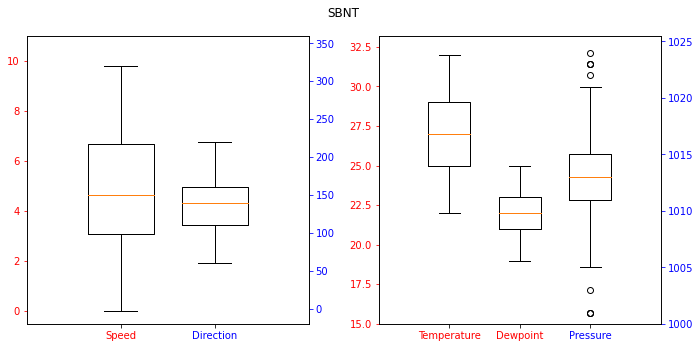

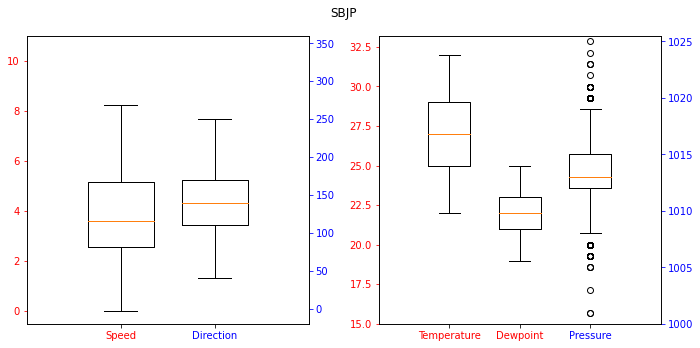

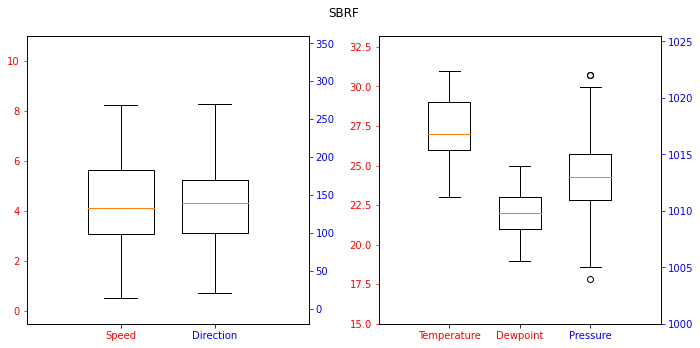

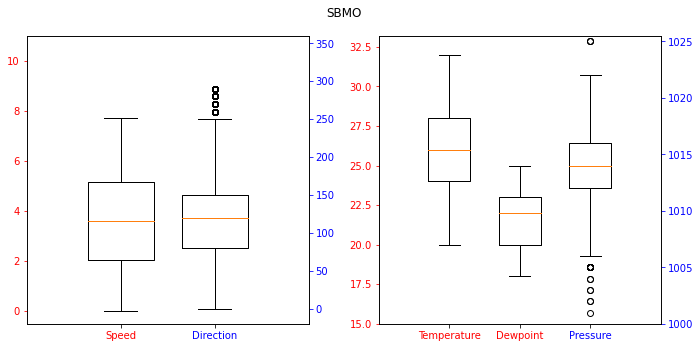

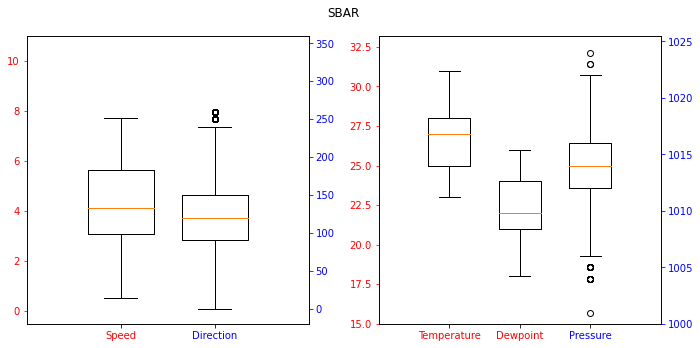

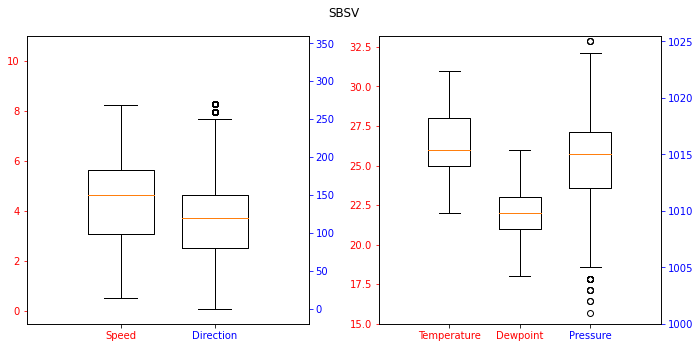

In [158]:
for i,n in enumerate(Names):
    dft = df_list[i] # Getting one station from the dataframe
    print(n)

    ## Removing outliers
    dft.dropna(inplace=True)
    dft = dft[(np.abs(stats.zscore(dft)) < 2).all(axis=1)]
        # print(stats.describe(dft))


    ## Boxplot
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11,5),facecolor='white')
    fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=.25)
    fig.suptitle(n)

        #### Subplot 1 - Speed & Direction
    r1 = ax1.boxplot(dft['speed'],positions=np.arange(1)-.25,widths=.35)
    ax3 = ax1.twinx() 
    r2 = ax3.boxplot(dft['direction'],positions=np.arange(1)+.25,widths=.35)
    ax1.set_xticklabels(['Speed','Direction'])
    ax1.tick_params(axis='y', colors='red')
    ax3.tick_params(axis='y', colors='blue')
    ax1.get_xticklabels()[0].set_color('red')
    ax1.get_xticklabels()[1].set_color('blue')
    ax1.set_ylim(-.5,11)
    ax3.set_ylim(-20,360)

        #### Subplot 2 - Temperature, Dewpoint & Pressure
    t1 = ax2.boxplot(dft['temperature'],positions=np.arange(1)-.50,widths=.3)
    t2 = ax2.boxplot(dft['dewpoint'],positions=np.arange(1),widths=.3)
    ax4 = ax2.twinx()
    t3 = ax4.boxplot(dft['pressure'],positions=np.arange(1)+.50,widths=.3)
    ax2.set_xticklabels(['Temperature','Dewpoint','Pressure'])
    ax2.tick_params(axis='y', colors='red')
    ax4.tick_params(axis='y', colors='blue')
    ax2.get_xticklabels()[0].set_color('red')
    ax2.get_xticklabels()[1].set_color('red')
    ax2.get_xticklabels()[2].set_color('blue')
    ax2.set_ylim(15,33.2)
    ax4.set_ylim(1000.0,1025.5)


    plt.savefig('d:/Users/julia/Desktop/Academia/01_Mestrado/Resultados/METAR/Figuras/' + n + '_BoxPlot.png',dpi=300)




### Figura da Serie com Mov. Average (24hrs)

In [ ]:
for i,n in enumerate(Names):
    dft = df_list[i] # Getting one station from the dataframe
    print(n)

    ## Removing outliers
    dft.dropna(inplace=True)
    dft = dft[(np.abs(stats.zscore(dft)) < 2).all(axis=1)]

    ## Creating a regular Time
                        ### Intervalo Fixo de tempo
    resample_index = pd.date_range(start='2002-06-01 00:00',end='2019-12-31 23:00', freq='H') 
    dummy_frame = pd.DataFrame(np.NaN, index=resample_index, columns=dft.columns)
    df=dummy_frame.combine_first(dft[:'2019-12-31 23:00'])
                        ### Intervalo da Serie
    # resample_index = pd.date_range(start=dft.index[0],end=dft.index[-1], freq='1H')
    # dummy_frame = pd.DataFrame(np.NaN, index=resample_index, columns=dft.columns)
    # df=dummy_frame.combine_first(dft)
    

    ## Interpolating
    df.interpolate(method='linear', limit=12, limit_direction='both', inplace=True)


    var_list = ['speed', 'direction', 'temperature', 'dewpoint', 'pressure']
    MA_list = ['speed_MA', 'direction_MA', 'temperature_MA', 'dewpoint_MA', 'pressure_MA']
    limits = [[0,10],[0,360],[20,32.5],[17,27],[1000,1030]]

    for var, MA, lim in zip(var_list, MA_list, limits):

        ## Janela de 24 horas
        df[MA] = df[var].rolling(window=24,center=True).mean()
        
        fig, ax = plt.subplots()       
        ax.plot(df.index,df[var], linewidth=.8, color='navy')
        ax.plot(df.index,df[MA], linewidth=.5, color='darkred')
        ax.set_title(n + ' - ' + var)
        ax.set_xlim([date(2002, 6, 1), date(2019, 12, 31)])
        ax.set_ylim(lim[0],lim[1])
        plt.tight_layout()
        plt.savefig('d:/Users/julia/Desktop/Academia/01_Mestrado/Resultados/METAR/Figuras/' + n + '_' + var + '.png',dpi=300)
        plt.close()
 


##### Hist Dir - Norte Verdadeiro

In [13]:
for i,n in enumerate(Names):
    dft = df_list[i] # Getting one station from the dataframe
    print(n)

    vel = dft.speed
    dire = dft.direction
    outputname = 'd:/Users/julia/Desktop/Academia/01_Mestrado/Resultados/METAR/Figuras/His_Dir/Serie_Total/Norte/'+n

    HistDir(P=vel,D=dire,Pmax=12,MaxProb=50,
            arqname=outputname,
            par='vento',interpolado=False,conv_oc=True)

SBNT
Done
SBJP
Done
SBRF
Done
SBMO
Done
SBAR
Done
SBSV
Done


###### Sazonal - DJF MAM JJA SON

In [14]:
for i,n in enumerate(Names):
    dft = df_list[i] # Getting one station from the dataframe
    print(n)
    
    ##### DIVISÃO PARA ESTUDOS SAZONAIS #####

    season = ((dft.index.month % 12 + 3) // 3).map({1:'DJF', 2: 'MAM', 3:'JJA', 4:'SON'})
    
    for i,s in enumerate(season.unique()):
        # print(s)
        vel_s = dft[season == s].speed
        dire_s = dft[season == s].direction

        outputname_s = 'd:/Users/julia/Desktop/Academia/01_Mestrado/Resultados/METAR/Figuras/His_Dir/Serie_Total/Norte/Metar_S1/'+n+'_'+s

        HistDir(P=vel_s,D=dire_s,Pmax=12,MaxProb=50,
                arqname=outputname_s,
                par='vento',interpolado=False,conv_oc=True)

SBNT
Done
Done
Done
Done
SBJP
Done
Done
Done
Done
SBRF
Done
Done
Done
Done
SBMO
Done
Done
Done
Done
SBAR
Done
Done
Done
Done
SBSV
Done
Done
Done
Done


### Sticky Plot

In [21]:
def vd2uv_wnd(vel,dire):
    a = np.deg2rad(dire)
    u_wnd = -vel*np.sin(a)
    v_wnd = -vel*np.cos(a)
    return (u_wnd,v_wnd)


SBNT
SBJP
SBRF
SBMO
SBAR
SBSV


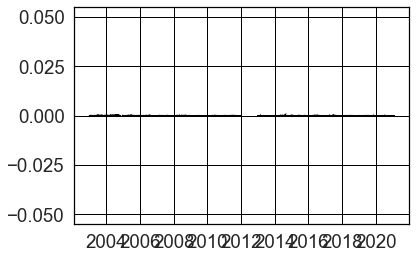

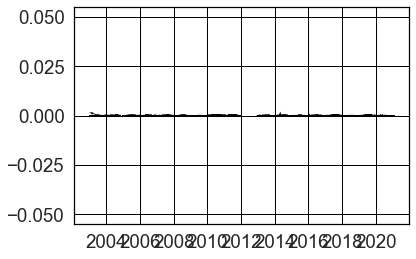

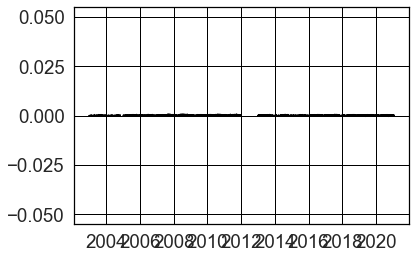

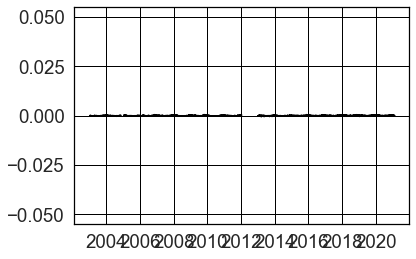

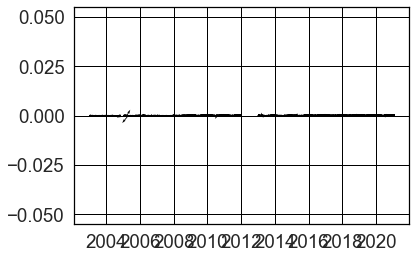

Error in callback <function flush_figures at 0x000001ECA49491F0> (for post_execute):


KeyboardInterrupt: 

In [26]:
for i,n in enumerate(Names):
    dft = df_list[i] # Getting one station from the dataframe
    print(n)

    vel = dft.speed
    dire = dft.direction

    u, v = vd2uv_wnd(vel,dire)
    magnitude = (u**2 + v**2)**0.5

    fig, ax = plt.subplots(1,1)

    q = ax.quiver(dft.index,0,u,v,)
            #    color='r',
            #    units='y',
            #    scale_units='y',
            #    scale = 1,
            #    headlength=1,
            #    headaxislength=1,
            #    width=0.004,
            #    alpha=0.5)

    


    

### Scatter - Metar x CFS

In [33]:
df_list

[                        speed  direction  temperature  dewpoint  pressure
 times                                                                    
 2003-01-01 04:00:00  5.658884       90.0         24.0      22.0    1013.0
 2003-01-01 06:00:00  4.629996       80.0         24.0      22.0    1013.0
 2003-01-01 07:00:00  4.115552       70.0         24.0      22.0    1013.0
 2003-01-01 10:00:00  5.144440       60.0         25.0      22.0    1013.0
 2003-01-01 11:00:00  6.173328       50.0         26.0      22.0    1015.0
 ...                       ...        ...          ...       ...       ...
 2021-01-25 19:00:00  7.716660       90.0         30.0      22.0    1009.0
 2021-01-25 20:00:00  7.716660       80.0         28.0      23.0    1009.0
 2021-01-25 21:00:00  6.173328       80.0         27.0      23.0    1010.0
 2021-01-25 22:00:00  5.144440       80.0         27.0      23.0    1010.0
 2021-01-25 23:00:00  4.629996       90.0         26.0      23.0    1011.0
 
 [49687 rows x 5 column

In [29]:
filenames = glob.glob("D:/Users/julia/Desktop/Academia/01_Mestrado/Dados/CFS/CFSv2/*.grb2.nc")
cfs2 = xr.open_mfdataset(filenames)
_, index = np.unique(cfs2['time'], return_index=True)
cfs2 = cfs2.isel(time=index)


In [93]:
cfs_sal = cfs2.sel(lat=-13,lon=360-38,method='nearest')
sbsv = df_list[-1]
sbsv = sbsv['2011-01-01 00:00:00':'2021-01-01 00:00:00']
resample_index = pd.date_range(start='2011-01-01 00:00:00',end='2021-01-01 00:00:00', freq='1H')
dummy_frame = pd.DataFrame(np.NaN, index=resample_index, columns=dft.columns)
sbsv=dummy_frame.combine_first(sbsv)

vel = sbsv.speed
dire = sbsv.direction
u,v = vd2uv_wnd(vel,dire)


ValueError: x and y must be the same size

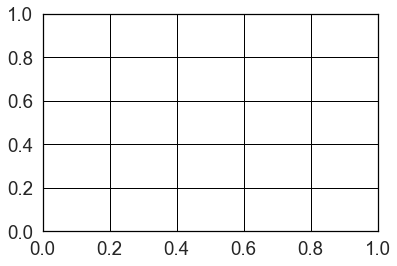

In [94]:
plt.scatter(cfs_sal.U_GRD_L103, u)

In [96]:
# cfs_sal.U_GRD_L103

banana = cfs_sal.U_GRD_L103.to_dataframe()
resample_index = pd.date_range(start='2011-01-01 00:00:00',end='2021-01-01 00:00:00', freq='1H')
dummy_frame = pd.DataFrame(np.NaN, index=resample_index, columns=banana.columns)
banana=dummy_frame.combine_first(banana)

banana

,lat,lon,U_GRD_L103
2011-01-01 00:00:00,NaN,NaN,NaN
2011-01-01 01:00:00,-12.981259,321.954529,-5.75
2011-01-01 02:00:00,-12.981259,321.954529,-5.78
2011-01-01 03:00:00,-12.981259,321.954529,-5.91
2011-01-01 04:00:00,-12.981259,321.954529,-5.86
...,...,...,...
2020-12-31 20:00:00,-12.981259,321.954529,-4.98
2020-12-31 21:00:00,-12.981259,321.954529,-5.41
2020-12-31 22:00:00,-12.981259,321.954529,-5.83
2020-12-31 23:00:00,-12.981259,321.954529,-6.11


In [101]:
pd.DataFrame(u)

,0
2011-01-01 00:00:00,NaN
2011-01-01 01:00:00,NaN
2011-01-01 02:00:00,NaN
2011-01-01 03:00:00,NaN
2011-01-01 04:00:00,NaN
...,...
2020-12-31 20:00:00,1.071987e+00
2020-12-31 21:00:00,-1.071987e+00
2020-12-31 22:00:00,-6.930134e-16
2020-12-31 23:00:00,-9.826549e-01


In [37]:
stats.describe(dft.pressure)

DescribeResult(nobs=55301, minmax=(1001.0, 1025.0), mean=1014.6903672627982, variance=10.611304857882326, skewness=0.001832532225472427, kurtosis=-0.502495251987789)

In [14]:
dummy_frame = pd.DataFrame(np.NaN, index=resample_index, columns=df.columns)

In [33]:
dft = dft.dropna()
stats.describe(dft)

DescribeResult(nobs=65528, minmax=(array([ 0.,  0.,  7.,  0., 19.]), array([  49.386624,  700.      ,   37.      ,   62.      , 1914.      ])), mean=array([   4.35806169,  130.61781223,   26.35925101,   21.90755097,
       1014.58973263]), variance=array([4.34749065e+00, 5.01212652e+03, 5.92393780e+00, 5.11233452e+00,
       1.25978152e+02]), skewness=array([ 5.87416716e-01,  1.11266028e+00, -2.78255089e-02, -2.05958129e-01,
       -5.88328482e+01]), kurtosis=array([ 6.50810541e+00,  1.59921522e+00, -2.51249902e-01,  3.49605763e+00,
        6.09078504e+03]))

{'whiskers': [<matplotlib.lines.Line2D at 0x1fbe9df5310>,
 'caps': [<matplotlib.lines.Line2D at 0x1fbe9df59d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fbebc3af70>,
 'medians': [<matplotlib.lines.Line2D at 0x1fbe9e0b0d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fbe9e0b430>,
 'means': []}

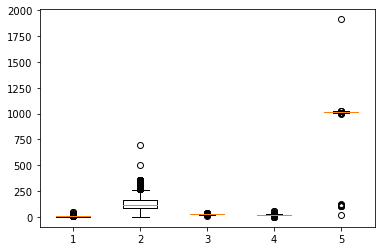

In [49]:
# boxplot = dft.boxplot(column=['temperature','dewpoint'])

plt.boxplot(dft)


(array([7.9330e+03, 2.7173e+04, 1.7719e+04, 2.8100e+03, 2.7780e+03,
        8.8900e+02, 0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.,  70., 140., 210., 280., 350., 420., 490., 560., 630., 700.]),
 <BarContainer object of 10 artists>)

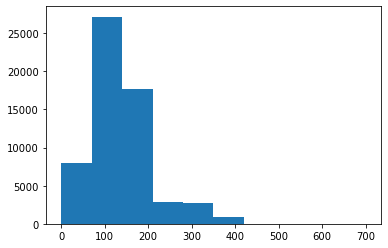

In [41]:
plt.hist(df.direction)

In [34]:
dft[(np.abs(stats.zscore(dft)) < 2).all(axis=1)]

,speed,direction,temperature,dewpoint,pressure
times,,,,,
2003-01-01 15:00:00,5.144440,60.0,30.0,24.0,1015.0
2003-01-01 17:00:00,5.144440,40.0,30.0,24.0,1013.0
2003-01-02 11:00:00,5.144440,40.0,27.0,23.0,1015.0
2003-01-02 16:00:00,8.745548,90.0,30.0,24.0,1013.0
2003-01-03 02:00:00,1.028888,60.0,25.0,22.0,1013.0
...,...,...,...,...,...
2021-01-25 19:00:00,5.144440,100.0,29.0,22.0,1012.0
2021-01-25 20:00:00,4.629996,100.0,29.0,22.0,1012.0
2021-01-25 21:00:00,3.601108,90.0,28.0,22.0,1012.0


### Analise Mensal - All Stations

##### Temperature

In [80]:
months = np.arange(1,13,1)
med = [[],[],[],[],[],[]]
desv = [[],[],[],[],[],[]]

for i,n in enumerate(Names):
    dft = df_list[i]

    for m in months:
        
        med[i].append(dft.temperature[dft.index.month.isin([m])].mean())
        desv[i].append(dft.temperature[dft.index.month.isin([m])].std())



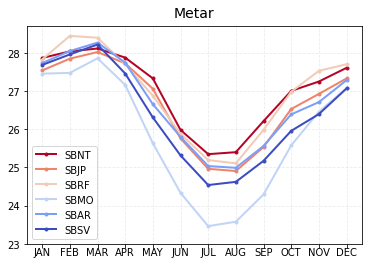

In [96]:

months_names = ['JAN','FEB','MAR',
                'APR','MAY','JUN',
                'JUL','AUG','SEP',
                'OCT','NOV','DEC']

fig, ax = plt.subplots()
ind=np.arange(12)

color=cm.coolwarm_r(np.linspace(0,1,6))
for i,c in zip(ind,color):
    ax.plot(months,med[i],c=c,marker='.',lw=2)
    ax.grid(linestyle='--',alpha=0.25)
    ax.set_yticks(np.arange(23,29,1))
    ax.set_xticks(months)
    ax.set_yticklabels(np.arange(23,29,1),fontsize=10)
    ax.set_xticklabels(months_names,fontsize=10,rotation=0,va='center_baseline')

    ax.set_title('Metar',fontsize=14,verticalalignment='bottom')
    
    ax.legend(labels=Names)

plt.savefig('d:/Users/julia/Desktop/Academia/01_Mestrado/Resultados/METAR/Temperatur.png',dpi=300)

##### WIND

In [304]:
med = [[],[],[],[],[],[]]
desv = [[],[],[],[],[],[]]
Coast_angle_Corr = [-15,0,20,40,40,45] 

for i,n in enumerate(Names):
    dft = df_list[i]

    dft.direction -= Coast_angle_Corr[i]
    dft.direction[dft.direction<0] += 360 

    vel = dft.speed
    dire = dft.direction

    u,v = veldire2uv(vel,dire,par='wnd')

    for m in months:
        med[i].append(u[u.index.month.isin([m])].mean())
        desv[i].append(u[u.index.month.isin([m])].std())
        

    

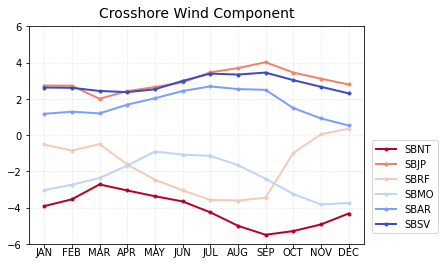

In [305]:
months_names = ['JAN','FEB','MAR',
                'APR','MAY','JUN',
                'JUL','AUG','SEP',
                'OCT','NOV','DEC']

fig, ax = plt.subplots()
ind=np.arange(12)

color=cm.coolwarm_r(np.linspace(0,1,6))
for i,c in zip(ind,color):
    ax.plot(months,med[i],c=c,marker='.',lw=2)
    ax.grid(linestyle='--',alpha=0.25)
    # ax.set_yticks(np.arange(23,29,1))
    ax.set_xticks(months)
    # ax.set_yticklabels(np.arange(23,29,1),fontsize=10)
    ax.set_xticklabels(months_names,fontsize=10,rotation=0,va='center_baseline')
    ax.set_ylim(-6,6)
    ax.set_title('Crosshore Wind Component',fontsize=14,verticalalignment='bottom')
    
    ax.legend(labels=Names,bbox_to_anchor=(1.01,0.5))

plt.savefig('d:/Users/julia/Desktop/Academia/01_Mestrado/Resultados/METAR/U.png',dpi=300)

In [318]:
med = [[],[],[],[],[],[]]
desv = [[],[],[],[],[],[]]
Coast_angle_Corr = [-15,0,20,40,40,45] 

for i,n in enumerate(Names):
    dft = df_list[i]

    dft.direction -= Coast_angle_Corr[i]
    dft.direction[dft.direction<0] += 360 

    vel = dft.speed
    dire = dft.direction

    u,v = veldire2uv(vel,dire,par='wnd')

    for m in months:
        med[i].append(v[v.index.month.isin([m])].mean())
        desv[i].append(v[v.index.month.isin([m])].std())
        

    

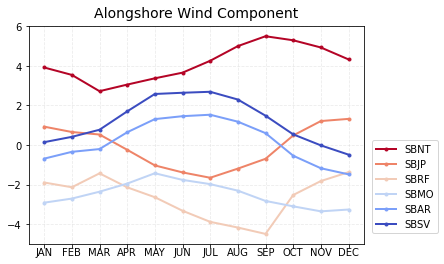

In [319]:

fig, ax = plt.subplots()
ind=np.arange(12)

color=cm.coolwarm_r(np.linspace(0,1,6))
for i,c in zip(ind,color):
    ax.plot(months,med[i],c=c,marker='.',lw=2)
    ax.grid(linestyle='--',alpha=0.25)
    # ax.set_yticks(np.arange(23,29,1))
    ax.set_xticks(months)
    # ax.set_yticklabels(np.arange(23,29,1),fontsize=10)
    ax.set_xticklabels(months_names,fontsize=10,rotation=0,va='center_baseline')

    ax.set_title('Alongshore Wind Component',fontsize=14,verticalalignment='bottom')
    
    ax.legend(labels=Names,bbox_to_anchor=(1.01,0.5))

plt.savefig('d:/Users/julia/Desktop/Academia/01_Mestrado/Resultados/METAR/V.png',dpi=300)

## - VERAO 2017-2018

SBNT


ValueError: Digital filter critical frequencies must be 0 < Wn < 1

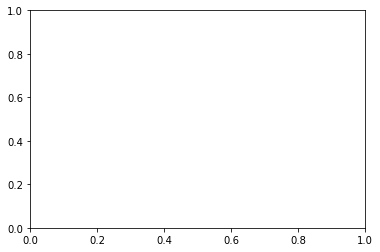

In [286]:
periods = [122,97,85,71,63,53]

fig, ax = plt.subplots()
ind=np.arange(12)

color=cm.coolwarm_r(np.linspace(0,1,6))

for i,n in enumerate(Names):
    dft = df_list[-i] # Getting one station from the dataframe
    dft.direction -= Coast_angle_Corr[i]
    dft.direction[dft.direction<0] += 360

    vel = dft.speed
    dire = dft.direction

    u, v = veldire2uv(vel,dire,par='wnd')
    dft['u'] = u.to_frame()
    dft['v'] = v.to_frame()
    
    dft = dft['2017-11-01':'2018-03-01']


    print(n)

    ## Removing outliers
    dft.dropna(inplace=True)
    dft = dft[(np.abs(stats.zscore(dft)) < 2).all(axis=1)]

    ## Creating a regular Time
                        ### Intervalo Fixo de tempo
    resample_index = pd.date_range(start='2017-11-01 00:00',end='2018-03-01 00:00', freq='H') 
    dummy_frame = pd.DataFrame(np.NaN, index=resample_index, columns=dft.columns)
    df=dummy_frame.combine_first(dft)

    #Filter requirements.
    T = df.shape[0]         # Sample Period
    fs = 0.000278       # sample rate, Hz
    cutoff = 1/periods[i]*3600      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz

   

    order = 2       # sin wave can be approx represented as quadratic
    n = int(T * fs)

    y = butter_lowpass_filter(v, cutoff, fs, order)

    # for c in zip(color):
    #     y.plot(c=c,marker='.',lw=2)
    #     ax.grid(linestyle='--',alpha=0.25)
    #     # ax.set_yticks(np.arange(23,29,1))
    #     # ax.set_xticks(months)
    #     # ax.set_yticklabels(np.arange(23,29,1),fontsize=10)
    #     # ax.set_xticklabels(months_names,fontsize=10,rotation=0,va='center_baseline')

    #     ax.set_title('Alongshore Wind Component',fontsize=14,verticalalignment='bottom')
        
    #     ax.legend(labels=Names,bbox_to_anchor=(1.01,0.5))


    

    

    

In [285]:
(2*np.pi)/((7.27*10**(-5))*np.cos(-5.91))/3600


122.7

3.931110152746472e-07

In [297]:
# Filter requirements.
T = df.shape[0]         # Sample Period
fs = 1/0.00278       # sample rate, Hz
cutoff = 3.600      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz

nyq = 0.5 * fs

order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs)

y = butter_lowpass_filter(v, cutoff, fs, order)

In [298]:
y

array([nan, nan, nan, ..., nan, nan, nan])

In [287]:

def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y  

In [162]:
period_sub = []

for l in Metar.Latitude:
    period_sub.append(np.pi/(7.27*10**(-5)*np.cos(l)))

In [169]:
np.pi/((7.2921*10**(-5))*np.cos(-13))

47620.53795789913

In [144]:
import numpy as np
from scipy.signal import butter,filtfilt